# Final Assignment

Author : Masuk

In [1]:
# make sure lenstronomy is installed, otherwise install the latest pip version
try:
    import lenstronomy
except:
    !pip install lenstronomy

In [2]:
# import of standard python libraries
import numpy as np
import corner
import matplotlib.pyplot as plt

%matplotlib inline

## Load imaging and psf data

In [3]:
import h5py  # library to work with '.h5' files

In [4]:
with h5py.File('./team_7_order_1.h5', 'r') as f:  # loading image data
    kwargs_data = {}
    for key in f:
        kwargs_data[key] = f[key][()]
        
kwargs_data

{'background_rms': 1.0,
 'dec_at_xy_0': -2.5,
 'exposure_time': array([[600., 600., 600., ..., 600., 600., 600.],
        [600., 600., 600., ..., 600., 600., 600.],
        [600., 600., 600., ..., 600., 600., 600.],
        ...,
        [600., 600., 600., ..., 600., 600., 600.],
        [600., 600., 600., ..., 600., 600., 600.],
        [600., 600., 600., ..., 600., 600., 600.]]),
 'image_data': array([[ 1.03524175, -0.64082584, -1.47638757, ...,  0.2566635 ,
         -1.26211907,  1.12324351],
        [-0.3604533 , -0.71306427, -1.18571592, ...,  0.80773681,
          0.15638371,  0.03279692],
        [ 0.56992024,  0.2489713 ,  0.91807352, ..., -0.27087028,
         -0.66841358, -1.27050781],
        ...,
        [ 0.15320153,  0.53997166,  0.15225182, ...,  0.79890636,
          1.38119862,  1.5943929 ],
        [ 1.73469589, -1.43705109, -0.75318786, ..., -0.95373261,
         -0.38856015,  0.43063936],
        [ 0.27830595, -1.73771859, -1.91817861, ...,  0.22774   ,
          0.2

In [5]:
with h5py.File('./psf.h5', 'r') as f:  # loading psf data
    kwargs_psf = {}
    for key in f:
        kwargs_psf[key] = f[key][()]
        
kwargs_psf['psf_type'] = 'PIXEL'
kwargs_psf

{'kernel_point_source': array([[1.46714056e-05, 9.35287062e-06, 2.90359435e-06, ...,
         2.42407100e-06, 5.52120082e-06, 9.09519076e-06],
        [7.63451408e-06, 1.79611307e-05, 1.13368797e-05, ...,
         7.41443273e-06, 1.10966384e-05, 6.48436162e-06],
        [3.48301955e-06, 9.31257364e-06, 2.13260555e-05, ...,
         1.47811070e-05, 8.54394057e-06, 2.13203589e-06],
        ...,
        [2.49122672e-06, 7.95732376e-06, 1.58199546e-05, ...,
         2.12852956e-05, 1.07839660e-05, 2.27358305e-06],
        [5.68529549e-06, 1.20736895e-05, 9.14792508e-06, ...,
         8.90241972e-06, 1.71794072e-05, 8.37546668e-06],
        [9.16680983e-06, 6.76754098e-06, 2.43588875e-06, ...,
         2.81313487e-06, 6.95127665e-06, 1.37739089e-05]], dtype=float32),
 'psf_type': 'PIXEL'}

<ipython-input-6-364b26a95dbf>:2: RuntimeWarning: invalid value encountered in log10
  plt.matshow(np.log10(kwargs_data['image_data']), origin='lower', cmap='cubehelix');


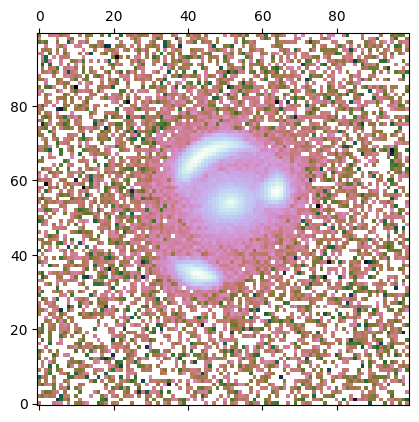

In [6]:
# extracting image_data from kwargs_data
plt.matshow(np.log10(kwargs_data['image_data']), origin='lower', cmap='cubehelix'); 

## Building a lens model

In [7]:
lens_model_list = ['EPL', 'SHEAR']  # adding shear into lens_model_list
source_model_list = ['SERSIC_ELLIPSE', 'SHAPELETS']  # adding shapelets into source_model_list
lens_light_model_list = ['SERSIC_ELLIPSE']

### Setting the parameters of the model

In [67]:
# lens galaxy's mass model
fixed_lens = []
kwargs_lens_init = []
kwargs_lens_sigma = []
kwargs_lower_lens = []
kwargs_upper_lens = []

fixed_lens.append({}) 

fixed_lens.append({'ra_0': 0, 'dec_0': 0})

kwargs_lens_init.append({'theta_E': 1, 'gamma': 2., 'e1': 0., 'e2': 0.,
                         'center_x': 0., 'center_y': 0.}) 

kwargs_lens_init.append({'gamma1': 0, 'gamma2': 0, 'ra_0': 0, 'dec_0': 0})

kwargs_lens_sigma.append({'theta_E': 0.01, 'gamma': .1, 'e1': 0.05, 'e2': 0.05,
                         'center_x': 0.5, 'center_y': 0.5}) 

kwargs_lens_sigma.append({'gamma1': .01, 'gamma2': .01, 'ra_0': 0.01, 'dec_0': 0.01})

kwargs_lower_lens.append({'theta_E': 0.1, 'gamma': 1., 'e1': -0.5,
                          'e2': -0.5, 'center_x': -10, 'center_y': -10}) 

kwargs_lower_lens.append({'gamma1': -0.3, 'gamma2': -0.3, 'ra_0': -2, 'dec_0': -2})

kwargs_upper_lens.append({'theta_E': 5, 'gamma': 3., 'e1': 0.5, 'e2': 0.5,
                          'center_x': 10, 'center_y': 10}) 

kwargs_upper_lens.append({'gamma1': 0.3, 'gamma2': 0.3, 'ra_0': 2, 'dec_0': 2})


lens_params = [kwargs_lens_init, kwargs_lens_sigma, fixed_lens, kwargs_lower_lens, kwargs_upper_lens]


# lens galaxy's light model
fixed_lens_light = []
kwargs_lens_light_init = []
kwargs_lens_light_sigma = []
kwargs_lower_lens_light = []
kwargs_upper_lens_light = []

fixed_lens_light.append({'n_sersic': 4.})

kwargs_lens_light_init.append({'R_sersic': 0.5, 'n_sersic': 2, 'e1': 0, 'e2': 0, 
                               'center_x': 0., 'center_y': 0, 'amp': 1})

kwargs_lens_light_sigma.append({'n_sersic': 1, 'R_sersic': 0.01, 'e1': 0.05, 'e2': 0.05,
                                'center_x': 0.1, 'center_y': 0.1, 'amp': 10})

kwargs_lower_lens_light.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001, 'n_sersic': .5,
                                'center_x': -10, 'center_y': -10, 'amp': 0})

kwargs_upper_lens_light.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 'n_sersic': 5.,
                                'center_x': 10, 'center_y': 10, 'amp': 100}) 


joint_lens_with_light = [[0, 0, ['center_x', 'center_y', 'e1', 'e2']]]


lens_light_params = [kwargs_lens_light_init, kwargs_lens_light_sigma, fixed_lens_light,
                     kwargs_lower_lens_light, kwargs_upper_lens_light]


# source galaxy's light model
fixed_source = []
kwargs_source_init = []
kwargs_source_sigma = []
kwargs_lower_source = []
kwargs_upper_source = []

fixed_source.append({'n_sersic': 1.}) 

fixed_source.append({'n_max': 5})

kwargs_source_init.append({'R_sersic': 0.2, 'n_sersic': 1, 'e1': 0, 'e2': 0,
                           'center_x': 0., 'center_y': 0, 'amp': 1}) 

kwargs_source_init.append({'beta': 1., 'n_max': 5, 'center_x': 0., 'center_y': 0.})

kwargs_source_sigma.append({'n_sersic': 0.5, 'R_sersic': 0.01, 'e1': 0.05, 'e2': 0.05,
                            'center_x': 0.2, 'center_y': 0.2, 'amp': 10})

kwargs_source_sigma.append({'beta': 10, 'n_max': 0.1, 'center_x': 0.2, 'center_y': 0.2})

kwargs_lower_source.append({'e1': -0.5, 'e2': -0.5, 'R_sersic': 0.001, 'n_sersic': .5,
                            'center_x': -10, 'center_y': -10, 'amp': 0})

kwargs_lower_source.append({'beta': 0.01, 'n_max': 2, 'center_x': -10, 'center_y': -10})

kwargs_upper_source.append({'e1': 0.5, 'e2': 0.5, 'R_sersic': 10, 'n_sersic': 5.,
                            'center_x': 10, 'center_y': 10, 'amp': 100})

kwargs_upper_source.append({'beta': 100, 'n_max': 8, 'center_x': 10, 'center_y': 10})


joint_centroid = [[0, 1, ['center_x', 'center_y']]]


source_params = [kwargs_source_init, kwargs_source_sigma, fixed_source,
                 kwargs_lower_source, kwargs_upper_source]


# combining all the above specification in the `kwargs_params` dictionary

kwargs_params = {'lens_model': lens_params,
                 'source_model': source_params,
                 'lens_light_model': lens_light_params}

kwargs_constraints = {'joint_lens_with_light': joint_lens_with_light,
                      'joint_source_with_source': joint_centroid
                      }

### Numerical settings

In [68]:
kwargs_likelihood = {'check_bounds': True}

kwargs_numerics = {'supersampling_factor': 1,  # Oversample the image plane by 2 when computing
                                               # the lensed image for better accuracy
                   'supersampling_convolution': False
                   }

### Combining all the information to be sent to lenstronomy

In [69]:
kwargs_model = {'lens_model_list': lens_model_list,
                'source_light_model_list': source_model_list,
                'lens_light_model_list': lens_light_model_list}

multi_band_list = [[kwargs_data, kwargs_psf, kwargs_numerics]]

kwargs_data_joint = {'multi_band_list': multi_band_list,
                     'multi_band_type': 'single-band'
                    }

## Here the model fitting is done

In [70]:
from lenstronomy.Workflow.fitting_sequence import FittingSequence


fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints,
                              kwargs_likelihood, kwargs_params)

fitting_kwargs_list = [['PSO', {'sigma_scale': 1., 'n_particles': 200,  # using Particle Swarm Optimization
                                'n_iterations': 100}],
                      ]

chain_list = fitting_seq.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_seq.best_fit()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-1.1370179192308982 reduced X^2 of best position
-5663.486255689104 log likelihood
9962 effective number of data points
[{'theta_E': 0.8101351371860528, 'gamma': 1.755421345293914, 'e1': 0.11589096305428974, 'e2': -0.06293244398360595, 'center_x': -0.08237535825885914, 'center_y': 0.1926950648929744}, {'gamma1': -0.02071727642213345, 'gamma2': -0.08345219990215509, 'ra_0': 0, 'dec_0': 0}] lens result
[{'amp': 1, 'R_sersic': 0.23815650973143365, 'n_sersic': 1.0, 'e1': -0.12996016528313806, 'e2': -0.06159985483018225, 'center_x': 0.011883567082495767, 'center_y': 0.09585868854606852}, {'amp': 1, 'n_max': 5, 'beta': 0.02531754317565283, 'center_x': 0.011883567082495767, 'center_y': 0.09585868854606852}] source result
[{'amp': 1, 'R_sersic': 0.5270192536566565, 'n_sersic': 4.0, 'e1': 0.11589096305428974, 'e2': -0.06293244398360595, 'center_x': -0.08237535825885914, 'center_y': 0.1926950648929744}] lens li

## Visualizing the fitted model

-1.1326972511378208 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1326972511378208


<ipython-input-71-894a431a6cee>:17: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


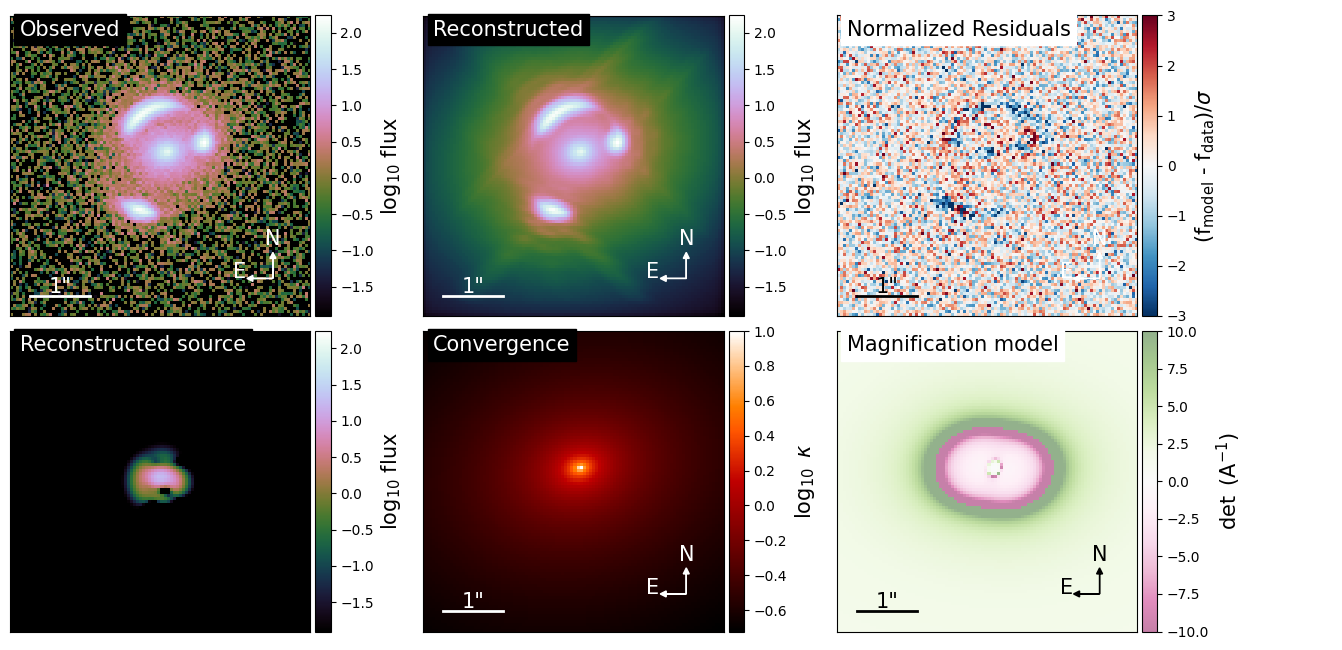

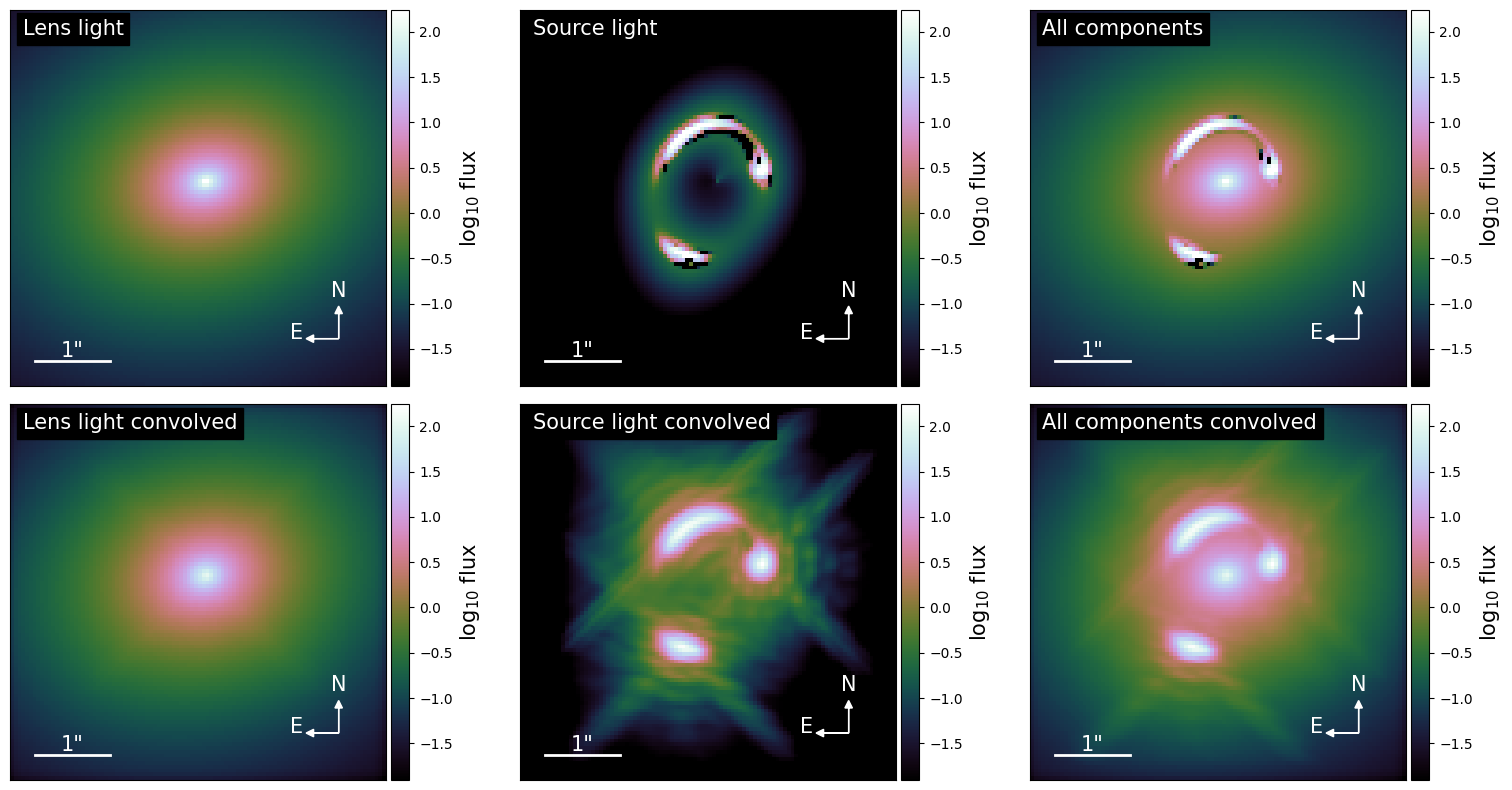

{'kwargs_lens': [{'theta_E': 0.8101351371860528, 'gamma': 1.755421345293914, 'e1': 0.11589096305428974, 'e2': -0.06293244398360595, 'center_x': -0.08237535825885914, 'center_y': 0.1926950648929744}, {'gamma1': -0.02071727642213345, 'gamma2': -0.08345219990215509, 'ra_0': 0, 'dec_0': 0}], 'kwargs_source': [{'amp': 1, 'R_sersic': 0.23815650973143365, 'n_sersic': 1.0, 'e1': -0.12996016528313806, 'e2': -0.06159985483018225, 'center_x': 0.011883567082495767, 'center_y': 0.09585868854606852}, {'amp': 1, 'n_max': 5, 'beta': 0.02531754317565283, 'center_x': 0.011883567082495767, 'center_y': 0.09585868854606852}], 'kwargs_lens_light': [{'amp': 1, 'R_sersic': 0.5270192536566565, 'n_sersic': 4.0, 'e1': 0.11589096305428974, 'e2': -0.06293244398360595, 'center_x': -0.08237535825885914, 'center_y': 0.1926950648929744}], 'kwargs_ps': [], 'kwargs_special': {}, 'kwargs_extinction': []}


In [71]:
from lenstronomy.Plots.model_plot import ModelPlot

model_plot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02,
                      cmap_string="cubehelix",
                      )

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.data_plot(ax=axes[0,0])
model_plot.model_plot(ax=axes[0,1])
model_plot.normalized_residual_plot(ax=axes[0,2], v_min=-3, v_max=3,
                                   cmap='RdBu_r')
model_plot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
model_plot.convergence_plot(ax=axes[1, 1], v_max=1, cmap='gist_heat')
model_plot.magnification_plot(ax=axes[1, 2], cmap='PiYG')

f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

model_plot.decomposition_plot(ax=axes[0,0], text='Lens light', 
                              lens_light_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,0], text='Lens light convolved',
                              lens_light_add=True)
model_plot.decomposition_plot(ax=axes[0,1], text='Source light',
                              source_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,1], text='Source light convolved',
                              source_add=True)
model_plot.decomposition_plot(ax=axes[0,2], text='All components',
                              source_add=True, lens_light_add=True, unconvolved=True)
model_plot.decomposition_plot(ax=axes[1,2], text='All components convolved',
                              source_add=True, lens_light_add=True, point_source_add=True)

f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()
print(kwargs_result)